In [36]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667


### Logistic Regression w/no SMOTE


Training Metrics:
Accuracy: 0.95
Precision: 0.91
Recall: 0.54
F1 Score: 0.68
Confusion Matrix:
[[108980    608]
 [  5222   6079]]

Test Metrics:
Accuracy: 0.95
Precision: 0.91
Recall: 0.54
F1 Score: 0.68
Confusion Matrix:
[[27218   155]
 [ 1319  1531]]

Confusion Matrix Visualizations:


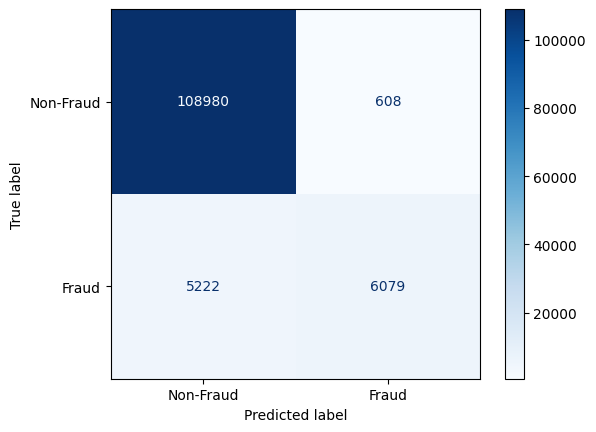

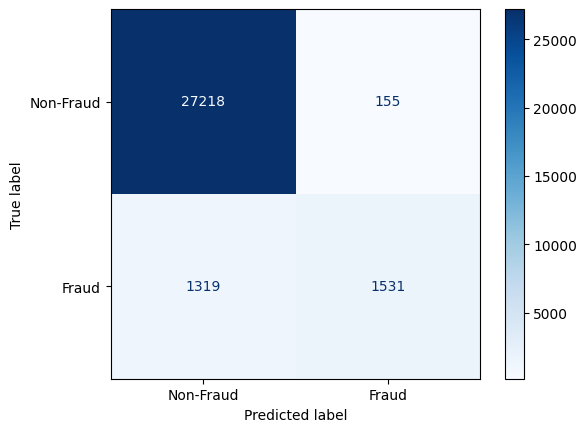

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'

# Train-test split
X = df[['time_difference', 'device_id']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate device_id_fraud_frequency using only the training set
device_fraud_counts_train = X_train[y_train == 1]['device_id'].value_counts()
X_train['device_id_fraud_frequency'] = X_train['device_id'].map(device_fraud_counts_train).fillna(0)

# Map the same feature to the test set using training data mapping
X_test['device_id_fraud_frequency'] = X_test['device_id'].map(device_fraud_counts_train).fillna(0)

# Final feature selection
X_train = X_train[['time_difference', 'device_id_fraud_frequency']]
X_test = X_test[['time_difference', 'device_id_fraud_frequency']]

# Train Logistic Regression on the original (non-resampled) data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions for training set and test set
y_train_pred = logreg.predict(X_train)  # Use original training set for predictions
y_test_pred = logreg.predict(X_test)  # Use original test set for predictions

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')


### Decision Tree w/no SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     0  11301]]

Test Metrics:
Accuracy: 0.98
Precision: 0.90
Recall (Sensitivity): 0.89
F1 Score: 0.90
Confusion Matrix:
[[27102   271]
 [  318  2532]]

Confusion Matrix Visualizations:


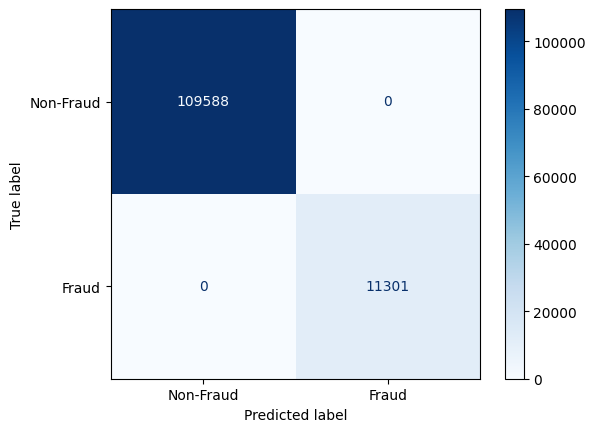

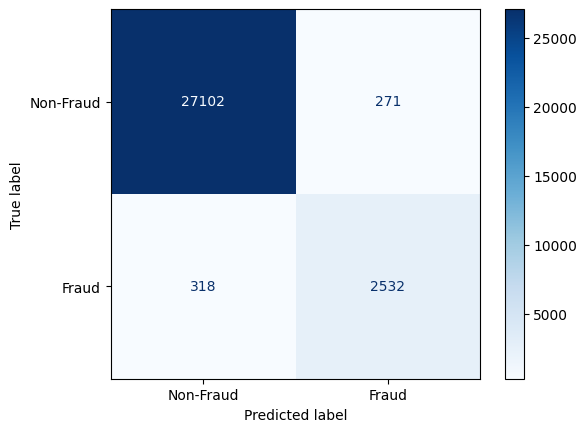

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Linear Regression w/SMOTE


Training Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1 Score: 0.99
Confusion Matrix:
[[107358   2230]
 [     0 109588]]

Test Metrics:
Accuracy: 0.98
Precision: 0.84
Recall: 1.00
F1 Score: 0.92
Confusion Matrix:
[[26849   524]
 [    0  2850]]

Confusion Matrix Visualizations:


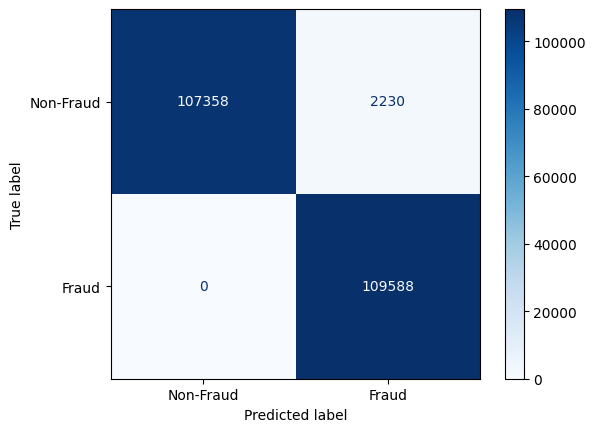

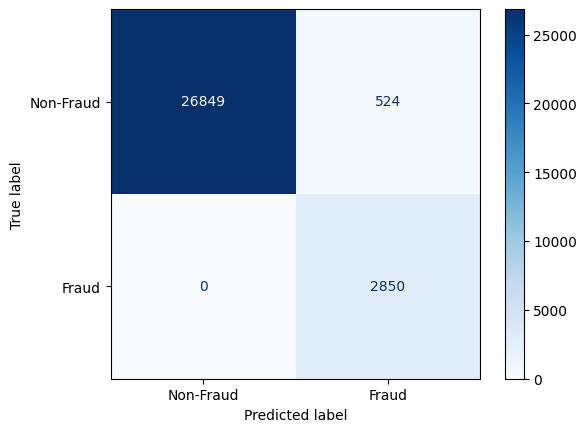

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
# Map device_id fraud frequency
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on the resampled data
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predictions for resampled training set and test set
y_train_pred = logreg.predict(X_train_resampled)  # Use resampled training set for predictions
y_test_pred = logreg.predict(X_test)  # Use original test set for predictions

# Metrics for training set (using resampled data)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_cm = confusion_matrix(y_train_resampled, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')


Training Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 1.00
F1 Score: 0.99
Confusion Matrix:
[[107684   1904]
 [     0 109588]]

Test Metrics:
Accuracy: 0.95
Precision: 0.79
Recall: 0.58
F1 Score: 0.67
Confusion Matrix:
[[26925   448]
 [ 1204  1646]]

Confusion Matrix Visualizations:


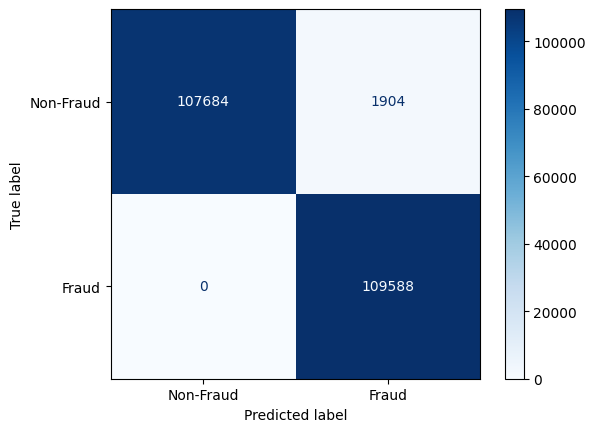

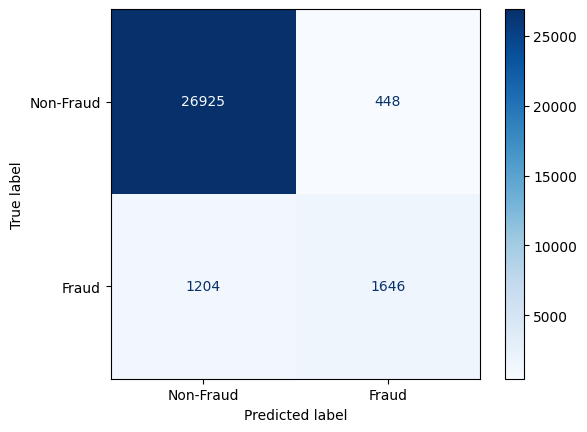

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'

# Train-test split
X = df[['time_difference', 'device_id']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate device_id_fraud_frequency using only the training set
device_fraud_counts_train = X_train[y_train == 1]['device_id'].value_counts()
X_train['device_id_fraud_frequency'] = X_train['device_id'].map(device_fraud_counts_train).fillna(0)

# Map the same feature to the test set using training data mapping
X_test['device_id_fraud_frequency'] = X_test['device_id'].map(device_fraud_counts_train).fillna(0)

# Final feature selection
X_train = X_train[['time_difference', 'device_id_fraud_frequency']]
X_test = X_test[['time_difference', 'device_id_fraud_frequency']]

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on the resampled data
logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)

# Predictions for resampled training set and test set
y_train_pred = logreg.predict(X_train_resampled)  # Use resampled training set for predictions
y_test_pred = logreg.predict(X_test)  # Use original test set for predictions

# Metrics for training set (using resampled data)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_cm = confusion_matrix(y_train_resampled, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Decision Tree w/SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     2 109586]]

Test Metrics:
Accuracy: 0.98
Precision: 0.89
Recall (Sensitivity): 0.95
F1 Score: 0.92
Confusion Matrix:
[[27038   335]
 [  145  2705]]

Confusion Matrix Visualizations:


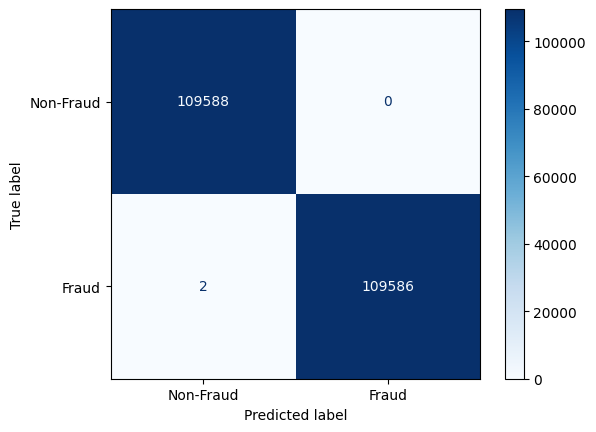

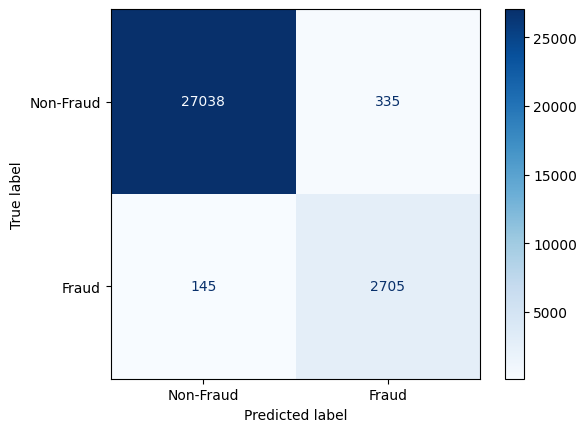

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing the dataset

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model training with resampled data
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)  # Train on the resampled data

# Predictions for training and test sets
y_train_pred = model.predict(X_train_resampled)  # Use resampled training set for predictions
y_test_pred = model.predict(X_test)  # Use original test set for predictions

# Metrics for training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_cm = confusion_matrix(y_train_resampled, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     1 109587]]

Test Metrics:
Accuracy: 0.95
Precision: 0.86
Recall (Sensitivity): 0.57
F1 Score: 0.69
Confusion Matrix:
[[27107   266]
 [ 1222  1628]]

Confusion Matrix Visualizations:


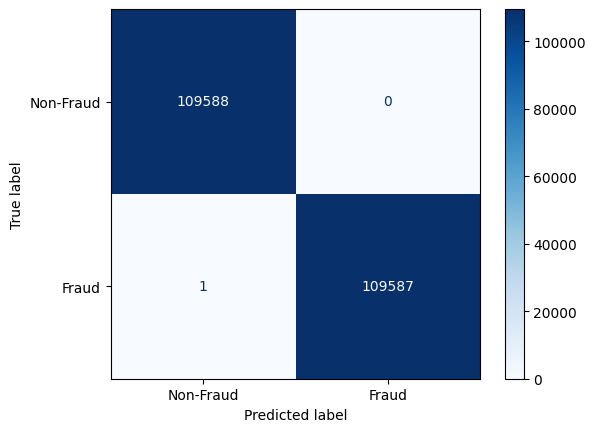

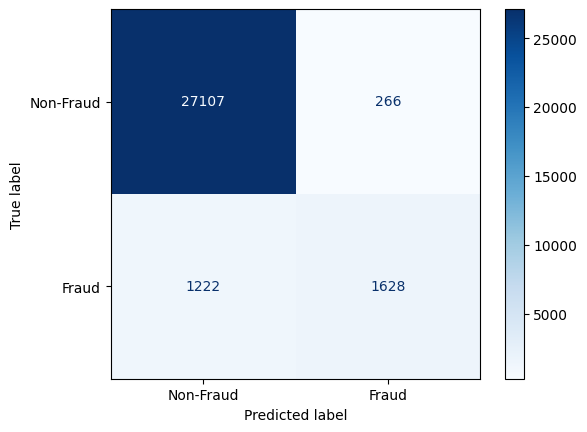

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing the dataset

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'

# Train-test split
X = df[['time_difference', 'device_id']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate device_id_fraud_frequency using only the training set
device_fraud_counts_train = X_train[y_train == 1]['device_id'].value_counts()
X_train['device_id_fraud_frequency'] = X_train['device_id'].map(device_fraud_counts_train).fillna(0)

# Map the same feature to the test set using training data mapping
X_test['device_id_fraud_frequency'] = X_test['device_id'].map(device_fraud_counts_train).fillna(0)

# Final feature selection
X_train = X_train[['time_difference', 'device_id_fraud_frequency']]
X_test = X_test[['time_difference', 'device_id_fraud_frequency']]

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model training with resampled data
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)  # Train on the resampled data

# Predictions for training and test sets
y_train_pred = model.predict(X_train_resampled)  # Use resampled training set for predictions
y_test_pred = model.predict(X_test)  # Use original test set for predictions

# Metrics for training set
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_cm = confusion_matrix(y_train_resampled, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Random Forest Classifier w/SMOTE

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Training Metrics:
Accuracy: 0.99
Precision: 0.87
Recall: 1.00
F1 Score: 0.93
Confusion Matrix:
[[107961   1627]
 [    23  11278]]

Test Metrics:
Accuracy: 0.99
Precision: 0.88
Recall: 1.00
F1 Score: 0.94
Confusion Matrix:
[[27000   373]
 [    9  2841]]

Confusion Matrix Visualizations:


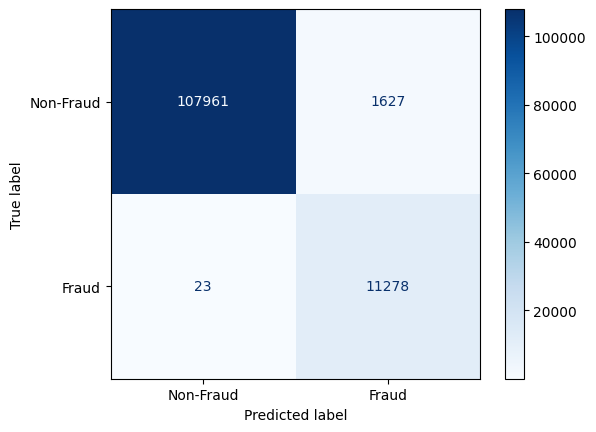

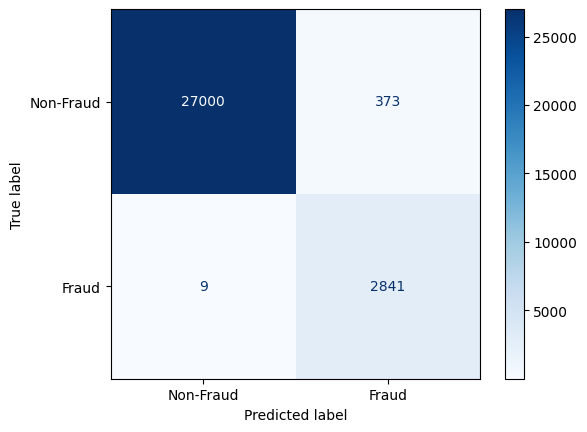

In [87]:
# Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
# Map device_id fraud frequency
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [None, 10],     # Limiting the depth
    'min_samples_split': [2],    # Only one value to test
    'min_samples_leaf': [1],     # Only one value to test
    'max_features': ['sqrt'],    # Use 'sqrt' instead of 'auto'
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=1, scoring='f1')

# Fit the model with the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the training and test sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Training Metrics:
Accuracy: 0.99
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
Confusion Matrix:
[[108294   1294]
 [    19  11282]]

Test Metrics:
Accuracy: 0.95
Precision: 0.85
Recall: 0.57
F1 Score: 0.68
Confusion Matrix:
[[27077   296]
 [ 1213  1637]]

Confusion Matrix Visualizations:


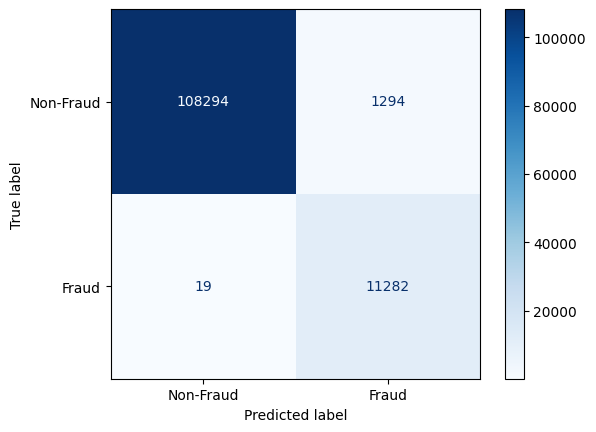

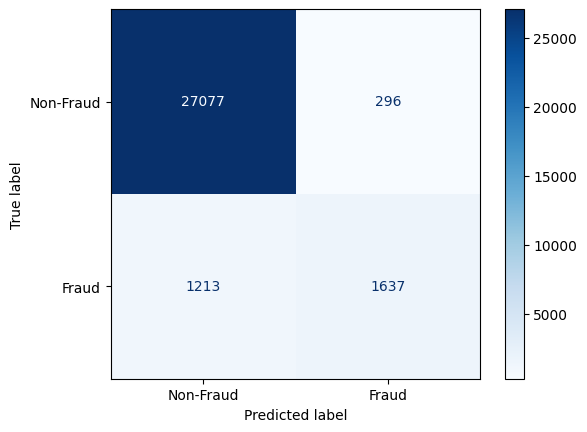

In [95]:
# Import required libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'

# Select features and target
X = df[['time_difference', 'device_id']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate device_id fraud frequency using only the training set
device_fraud_counts_train = X_train[y_train == 1]['device_id'].value_counts()
X_train['device_id_fraud_frequency'] = X_train['device_id'].map(device_fraud_counts_train).fillna(0)

# Map the same feature to the test set using the training set's mapping
X_test['device_id_fraud_frequency'] = X_test['device_id'].map(device_fraud_counts_train).fillna(0)

# Final feature selection
X_train = X_train[['time_difference', 'device_id_fraud_frequency']]
X_test = X_test[['time_difference', 'device_id_fraud_frequency']]

# Apply SMOTE to the training data (before fitting the model)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100],  # Fewer trees
    'max_depth': [None, 10],     # Limiting the depth
    'min_samples_split': [2],    # Only one value to test
    'min_samples_leaf': [1],     # Only one value to test
    'max_features': ['sqrt'],    # Use 'sqrt' instead of 'auto'
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=StratifiedKFold(n_splits=5), n_jobs=-1, verbose=1, scoring='f1')

# Fit the model with the best hyperparameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict on the training and test sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model and print its parameters
best_dt = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# Use the best model to make predictions
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate and print metrics for the best model
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print metrics
print(f"\nTraining Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")
print(f"\nTest Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'class_weight': None, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Training Accuracy: 0.99
Training Precision: 0.90
Training Recall: 1.00
Training F1 Score: 0.94

Test Accuracy: 0.95
Test Precision: 0.85
Test Recall: 0.57
Test F1 Score: 0.68


| Model | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train Recall | Test Recall | Train F1 Score | Test F1 Score |
|----------------------------|----------------|---------------|-----------------|----------------|--------------|-------------|----------------|---------------|
| Logistic Regression        | 0.95           | 0.95          | 0.91            | 0.91           | 0.54         | 0.54        | 0.68           | 0.68          |
| Decision Tree Classifier   | 1.00           | 0.98          | 1.00            | 0.90           | 1.00         | 0.89        | 1.00           | 0.90          |
| Logistic Regression w/SMOTE| 0.99           | 0.98          | 0.98            | 0.84           | 1.00         | 1.00        | 0.99           | 0.92          |
| Decision Tree w/SMOTE      | 1.00           | 0.98          | 1.00            | 0.89           | 1.00         | 0.95        | 1.00           | 0.92          |
| Random Forest w/SMOTE      | 0.99           | 0.99          | 0.87            | 0.88           | 1.00         | 1.00        | 0.93           | 0.94          |

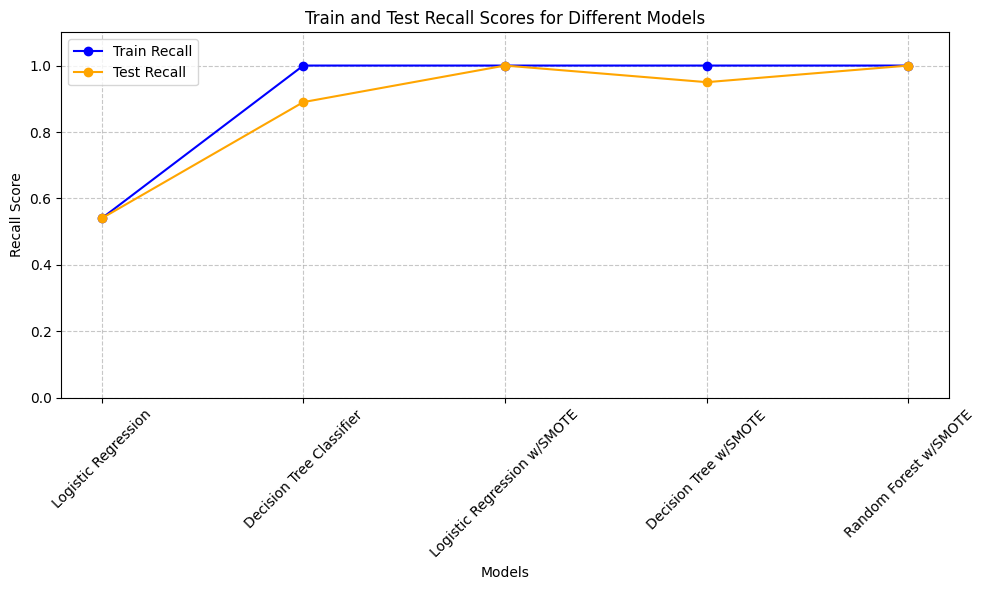

In [63]:
import matplotlib.pyplot as plt

# Model names and recall scores
models = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Logistic Regression w/SMOTE",
    "Decision Tree w/SMOTE",
    "Random Forest w/SMOTE",
]
train_recall = [0.54, 1.00, 1.00, 1.00, 1.00]
test_recall = [0.54, 0.89, 1.00, 0.95, 1.00]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(models, train_recall, marker='o', label="Train Recall", color="blue")
plt.plot(models, test_recall, marker='o', label="Test Recall", color="orange")

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Train and Test Recall Scores for Different Models")
plt.ylim(0, 1.1)  # Set y-axis limits for better visibility
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show the grid and the plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

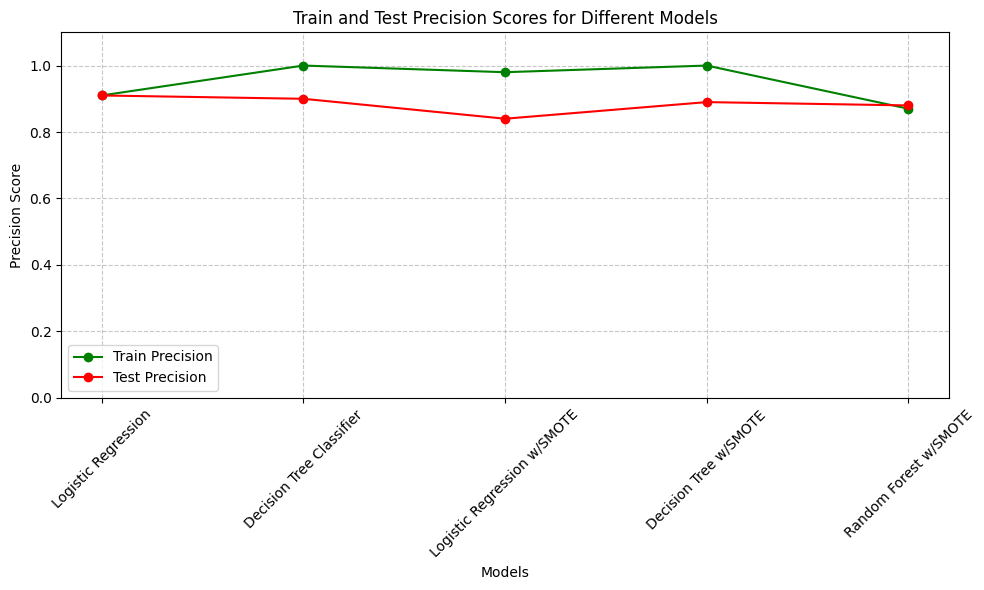

In [64]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Logistic Regression w/SMOTE",
    "Decision Tree w/SMOTE",
    "Random Forest w/SMOTE",
]

# Precision scores
train_precision = [0.91, 1.00, 0.98, 1.00, 0.87]
test_precision = [0.91, 0.90, 0.84, 0.89, 0.88]

# Plot Precision Scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_precision, marker='o', label="Train Precision", color="green")
plt.plot(models, test_precision, marker='o', label="Test Precision", color="red")
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Train and Test Precision Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

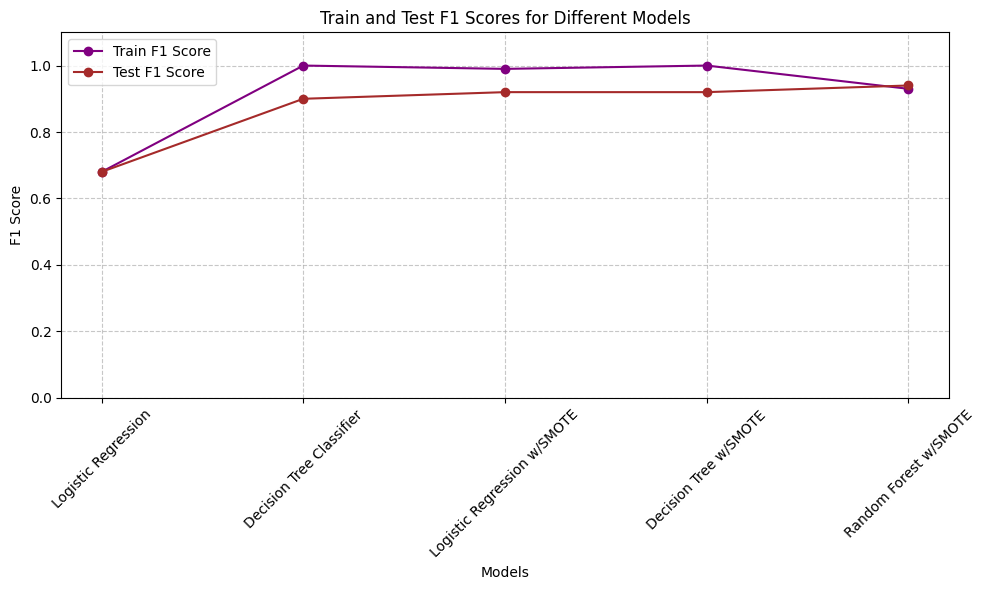

In [65]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Logistic Regression w/SMOTE",
    "Decision Tree w/SMOTE",
    "Random Forest w/SMOTE",
]

# F1 scores
train_f1 = [0.68, 1.00, 0.99, 1.00, 0.93]
test_f1 = [0.68, 0.90, 0.92, 0.92, 0.94]

# Plot F1 Scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_f1, marker='o', label="Train F1 Score", color="purple")
plt.plot(models, test_f1, marker='o', label="Test F1 Score", color="brown")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Train and Test F1 Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()